In [1]:
# Necessary imports.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# First, we take all of the data and make a color-magnitude diagram.
data = pd.read_csv("DES_test.csv")

Text(0.5, 0, 'G-R Color')

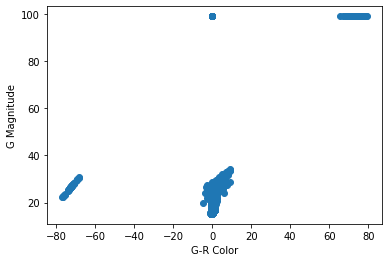

In [12]:
plt.plot(data.G-data.R, data.G, "o")
plt.ylabel("G Magnitude")
plt.xlabel("G-R Color")

It's pretty obvious that there are some weird points here.  We can find that all of the observed strangeness comes from data points where the objects were not seen, resulting in listed magnitudes of 99.

In [13]:
# Isolate and remove these dropouts.
dropouts_g = data[data.G==99]
print("{:.2f}% are G dropouts".format(len(dropouts_g)/len(data)*100 ))
dropouts_r = data[data.R==99]
print("{:.2f}% are R dropouts".format(len(dropouts_r)/len(data)*100 ))
dropouts_i = data[data.I==99]
print("{:.2f}% are I dropouts".format(len(dropouts_i)/len(data)*100 ))
dropouts_z = data[data.Z==99]
print("{:.2f}% are Z dropouts".format(len(dropouts_z)/len(data)*100 ))
dropouts_y = data[data.Y==99]
print("{:.2f}% are Y dropouts".format(len(dropouts_y)/len(data)*100 ))
no_dropouts = data[data.G!=99]
no_dropouts = no_dropouts[no_dropouts.R!=99]
no_dropouts = no_dropouts[no_dropouts.I!=99]
no_dropouts = no_dropouts[no_dropouts.Z!=99]
no_dropouts = no_dropouts[no_dropouts.Y!=99]
print("{:.2f}% are dropouts".format(((len(data)-len(no_dropouts))/len(data)*100 )))


1.31% are G dropouts
0.12% are R dropouts
0.00% are I dropouts
0.12% are Z dropouts
1.08% are Y dropouts
2.38% are dropouts


Text(0.5, 0, 'I-Z Color')

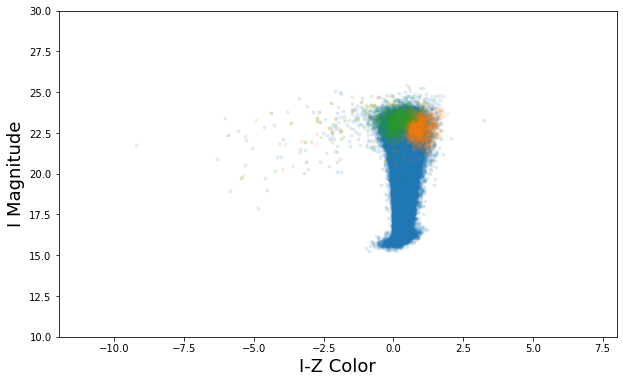

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(no_dropouts.I-no_dropouts.Z, no_dropouts.I, ".", label="No dropouts", alpha=0.1)
plt.plot(dropouts_g.I-dropouts_g.Z, dropouts_g.I, ".", label="G Dropout", alpha=0.1)
plt.plot(dropouts_y.I-dropouts_y.Z, dropouts_y.I, ".", label="Y Dropout", alpha=0.1)
#plt.plot(dropouts_r.I-dropouts_r.Z, dropouts_r.I, ".", label="R Dropout")
plt.xlim(-12, 8)
#plt.legend(fontsize=18)
plt.ylim(10, 30)
plt.ylabel("I Magnitude",fontsize=18)
plt.xlabel("I-Z Color",fontsize=18)

Makes sense that the targets with nothing in G (the bluest band) have redder colors, while those with nothing in Y (the reddest band) have bluer colors.

Let's make color magnitude plots.  TODO: physical interpretations of these?

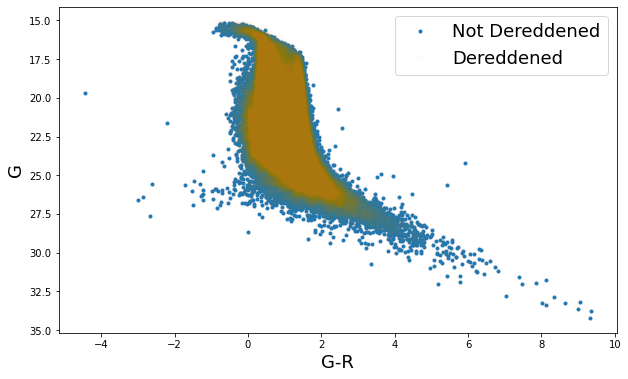

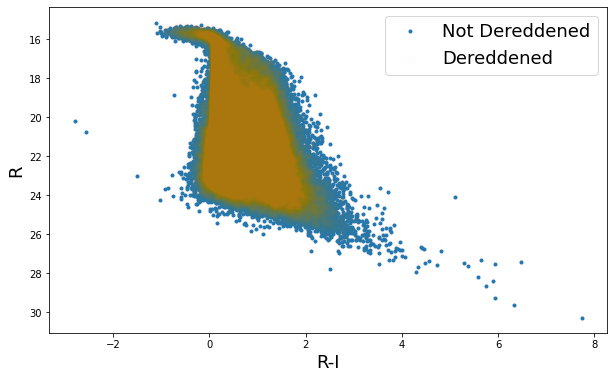

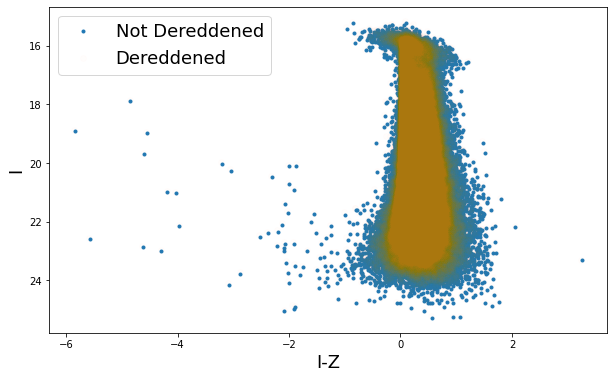

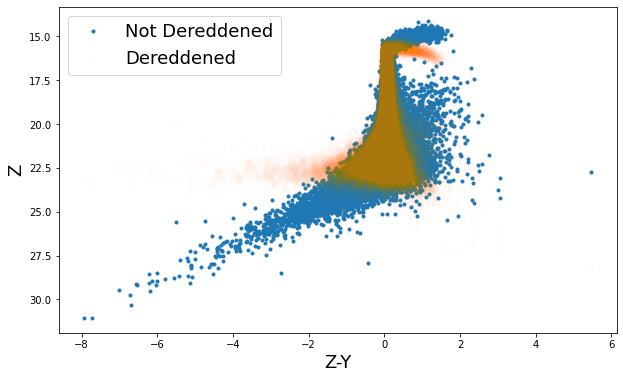

In [15]:
# Make color magnitude diagrams of everything.

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.plot(no_dropouts.G-no_dropouts.R, no_dropouts.G, ".", label="Not Dereddened")
plt.plot(no_dropouts.MAG_AUTO_G_DERED-no_dropouts.MAG_AUTO_R_DERED, no_dropouts.MAG_AUTO_G_DERED, "o", label="Dereddened", alpha=0.01)
plt.xlabel("G-R", fontsize=18)
plt.ylabel("G",fontsize=18)
plt.legend(fontsize=18)
plt.show()


plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.plot(no_dropouts.R-no_dropouts.I, no_dropouts.R, ".", label="Not Dereddened")
plt.plot(no_dropouts.MAG_AUTO_R_DERED-no_dropouts.MAG_AUTO_I_DERED, no_dropouts.MAG_AUTO_R_DERED, "o", label="Dereddened", alpha=0.01)
plt.xlabel("R-I", fontsize=18)
plt.ylabel("R",fontsize=18)
plt.legend(fontsize=18)
plt.show()

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.plot(no_dropouts.I-no_dropouts.Z, no_dropouts.I, ".", label="Not Dereddened")
plt.plot(no_dropouts.MAG_AUTO_I_DERED-no_dropouts.MAG_AUTO_Z_DERED, no_dropouts.MAG_AUTO_I_DERED, "o", label="Dereddened", alpha=0.01)
plt.xlabel("I-Z", fontsize=18)
plt.ylabel("I",fontsize=18)
plt.legend(fontsize=18)
plt.show()


plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.plot(no_dropouts.Z-no_dropouts.Y, no_dropouts.Y, ".", label="Not Dereddened")
plt.plot(no_dropouts.MAG_AUTO_Z_DERED-no_dropouts.MAG_AUTO_Y_DERED, no_dropouts.MAG_AUTO_Z_DERED, "o", label="Dereddened", alpha=0.01)
plt.xlabel("Z-Y", fontsize=18)
plt.ylabel("Z",fontsize=18)
plt.legend(fontsize=18)
plt.show()

Make a couple of color-color plots.  I know that these are used for things, maybe for dereddening?

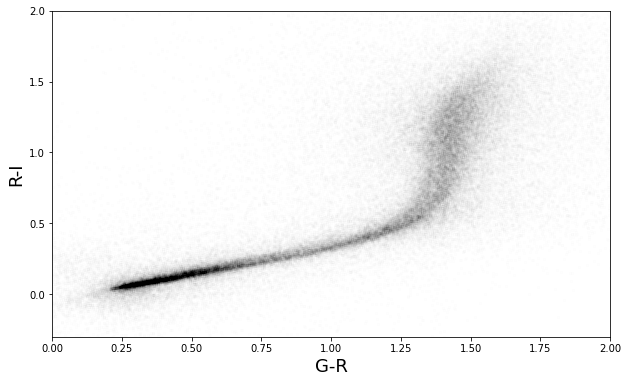

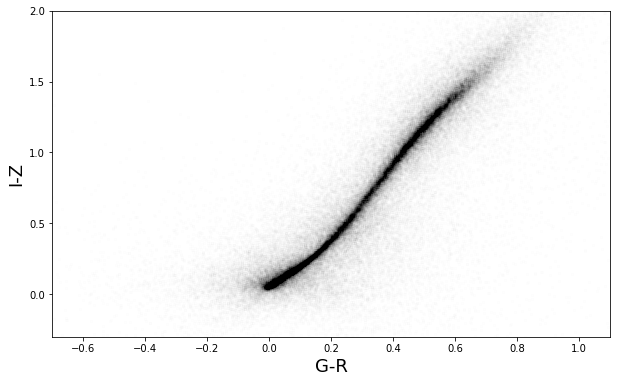

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(no_dropouts.MAG_AUTO_G_DERED-no_dropouts.MAG_AUTO_R_DERED, no_dropouts.MAG_AUTO_R_DERED-no_dropouts.MAG_AUTO_I_DERED, ".k", label="Dereddened", alpha=0.002)
plt.xlabel("G-R", fontsize=18)
plt.ylabel("R-I",fontsize=18)
plt.xlim(0, 2)
plt.ylim(-0.3, 2)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(no_dropouts.MAG_AUTO_I_DERED-no_dropouts.MAG_AUTO_Z_DERED, no_dropouts.MAG_AUTO_R_DERED-no_dropouts.MAG_AUTO_I_DERED, ".k", label="Dereddened", alpha=0.002)
plt.xlabel("G-R", fontsize=18)
plt.ylabel("I-Z",fontsize=18)
plt.xlim(-0.7, 1.1)
plt.ylim(-0.3, 2)
plt.show()



Plots of things and how they vary with galactic latitude and longitude.

KEEP IN MIND:
latitude (also known as b) is between -90-90 degrees.  At 0 degrees we are in the galactic plane.  As it decreases we go below the plane.  

TODO: number counts of stars with varying b?

Longitude (also known as l) is between 0 and 360 degrees.  The galactic center is at 0 degrees.  

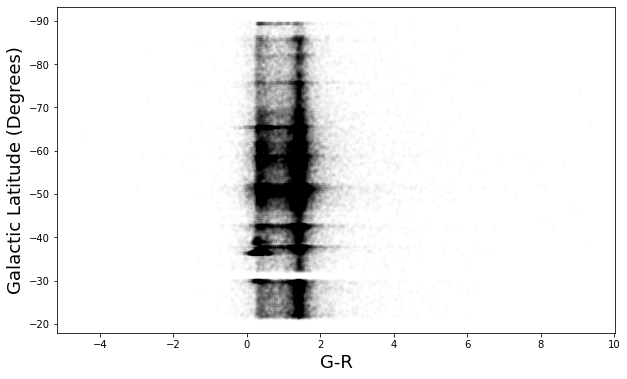

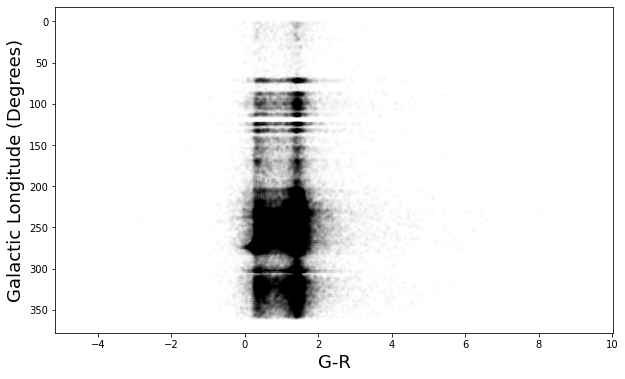

In [17]:
plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.plot(no_dropouts.MAG_AUTO_G_DERED-no_dropouts.MAG_AUTO_R_DERED, no_dropouts.GALACTIC_B, ".k", alpha=0.01)
plt.xlabel("G-R", fontsize=18)
plt.ylabel("Galactic Latitude (Degrees)",fontsize=18)
plt.show()

plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.plot(no_dropouts.MAG_AUTO_G_DERED-no_dropouts.MAG_AUTO_R_DERED, no_dropouts.GALACTIC_L, ".k", alpha=0.01)
plt.xlabel("G-R", fontsize=18)
plt.ylabel("Galactic Longitude (Degrees)",fontsize=18)
plt.show()

Text(0, 0.5, 'Declination')

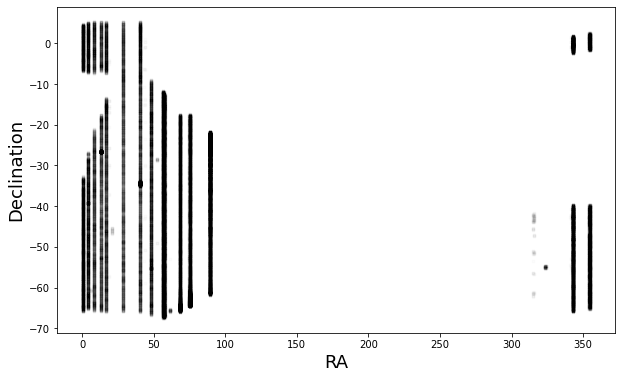

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(no_dropouts.RA, no_dropouts.DEC, ".k", alpha=0.01)
plt.xlabel("RA", fontsize=18)
plt.ylabel("Declination", fontsize=18)

There is clearly some kind of scanning pattern here, such that it is fairly obvious that the full sky was not sampled evenly.

Note that the galactic latitude and longitude do seem to have some sort of relationship.


Text(0, 0.5, 'Galactic Latitude')

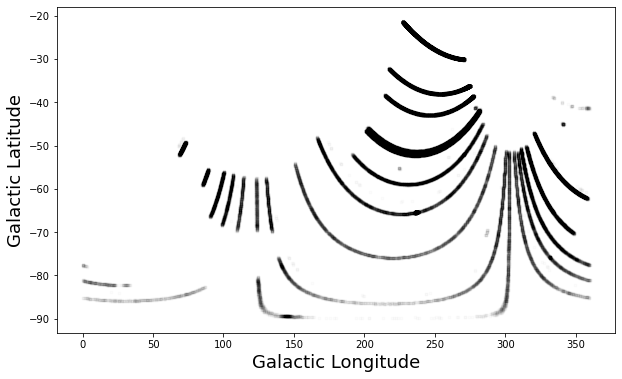

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(no_dropouts.GALACTIC_L, no_dropouts.GALACTIC_B, ".k", alpha=0.01)
plt.xlabel("Galactic Longitude", fontsize=18)
plt.ylabel("Galactic Latitude", fontsize=18)

Do these individual lines in RA/Dec space map to a specific line in galactic coordinates?

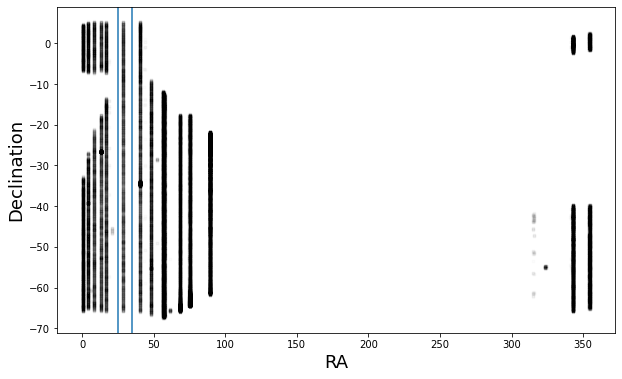

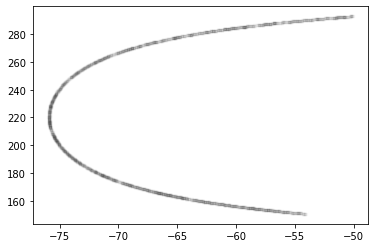

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(no_dropouts.RA, no_dropouts.DEC, ".k", alpha=0.01)
plt.xlabel("RA", fontsize=18)
plt.ylabel("Declination", fontsize=18)

plt.axvline(25)
plt.axvline(35)
plt.show()


idx = np.where((no_dropouts.RA>25)&(no_dropouts.RA<35))

plt.plot(np.array(no_dropouts.GALACTIC_B)[idx], np.array(no_dropouts.GALACTIC_L)[idx], ".k", alpha=0.01)

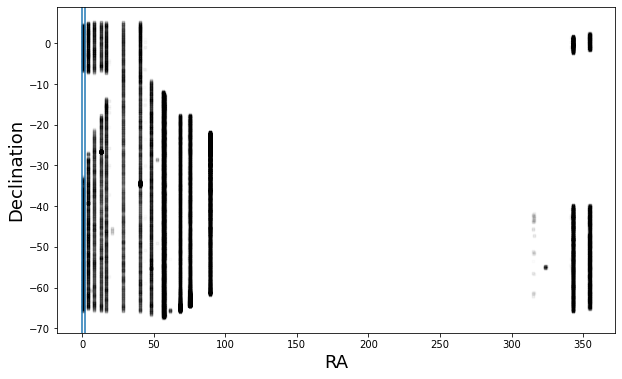

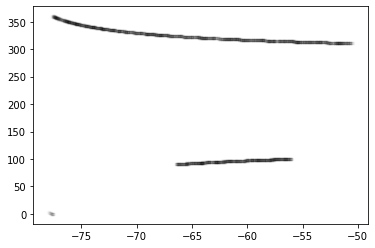

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(no_dropouts.RA, no_dropouts.DEC, ".k", alpha=0.01)
plt.xlabel("RA", fontsize=18)
plt.ylabel("Declination", fontsize=18)

plt.axvline(0)
plt.axvline(2)
plt.show()


idx = np.where((no_dropouts.RA>0)&(no_dropouts.RA<2))

plt.plot(np.array(no_dropouts.GALACTIC_B)[idx], np.array(no_dropouts.GALACTIC_L)[idx], ".k", alpha=0.01)

So this "structure" in galactic b vs l just comes from the fact that these stars fall in relatively straight lines in RA vs dec space.  

TODO: Figure out how to account for this uneven-ness?  Somehow introduce some sort of normalization factor based on amount of area in phase space that is covered?

As I'm interested in studying counts of stars versus galactic latitude and longitude and don't want to get burned by the structure in the b vs l space, I'll focus my energy on stars that come from the same "line" of RA's.  To start, I'll go with the one that encompasses the widest range in declination space:

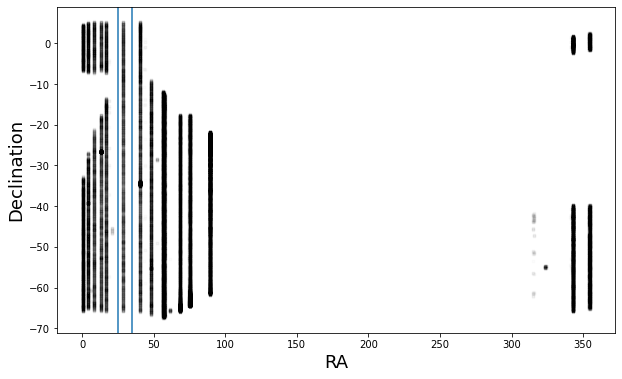

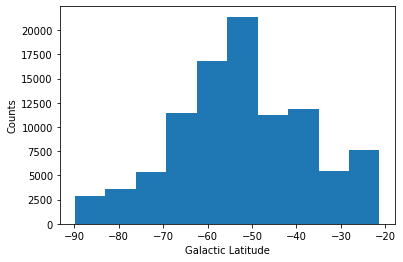

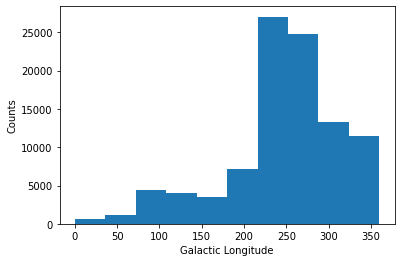

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(no_dropouts.RA, no_dropouts.DEC, ".k", alpha=0.01)
plt.xlabel("RA", fontsize=18)
plt.ylabel("Declination", fontsize=18)

plt.axvline(25)
plt.axvline(35)
plt.show()


idx = np.where((no_dropouts.RA>25)&(no_dropouts.RA<35))

plt.hist(np.array(no_dropouts.GALACTIC_B)) 
plt.xlabel("Galactic Latitude")
plt.ylabel("Counts")
plt.show()

plt.hist(np.array(no_dropouts.GALACTIC_L))
plt.xlabel("Galactic Longitude")
plt.ylabel("Counts")

plt.show()

This doesn't look great.  Maybe let's try to make some sort of plot that includes all of the data?

/home/dawnleaf/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dawnleaf/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


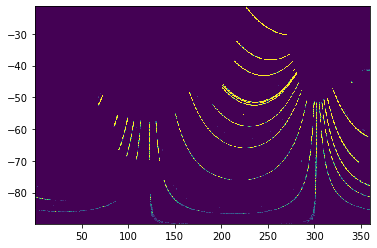

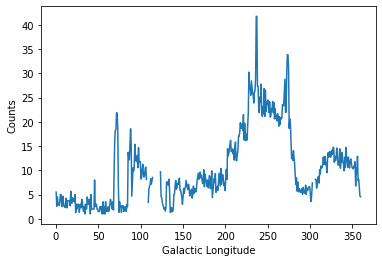

Text(0, 0.5, 'Counts')

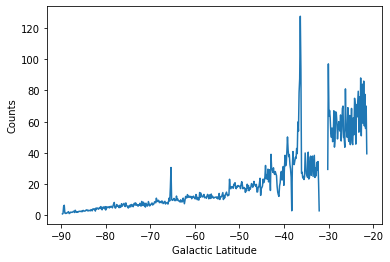

In [23]:
h, xedges, yedges,_ = plt.hist2d(no_dropouts.GALACTIC_L, no_dropouts.GALACTIC_B, bins=500, vmax=10)

# Trying to normalize by the fact that things are only visible in streaks, 
# so any area not encompassed by a "streak" is not available and thus should not 
# count against the existence of stars at that latitude/longitude.

longs = (xedges[1:]+xedges[:-1])/2
lats = (yedges[1:]+yedges[:-1])/2
longs_d = np.zeros(len(longs))
lats_d = np.zeros(len(lats))

for i in range(len(h)):
    longs_d[i] = np.mean(h[i][h[i]>0])
    lats_d[i] = np.mean(h[:, i][h[:, i]>0])
plt.show()
    
plt.plot(longs, longs_d)
plt.xlabel("Galactic Longitude")
plt.ylabel("Counts")
plt.show()
plt.plot(lats, lats_d)
plt.xlabel("Galactic Latitude")
plt.ylabel("Counts")

Not super happy with this, but I'll probably have to address it more thoroughly later.  Maybe it will get fixed if we load in a larger amount of stars?

Let's find an "average color" as a function of galactic latitude and longitude.  

/home/dawnleaf/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dawnleaf/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


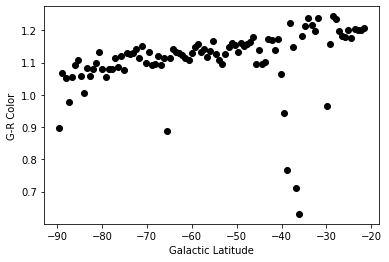

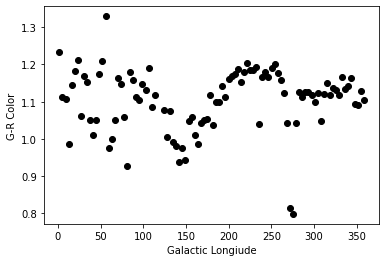

In [24]:
lat_bins = np.linspace(np.min(no_dropouts.GALACTIC_B), np.max(no_dropouts.GALACTIC_B), 101)
long_bins = np.linspace(np.min(no_dropouts.GALACTIC_L), np.max(no_dropouts.GALACTIC_L), 101)
gr_lat = np.zeros(len(lat_bins)-1)
gr_long = np.zeros(len(long_bins)-1)

b = np.array(no_dropouts.GALACTIC_B)
l = np.array(no_dropouts.GALACTIC_L)
gr_color = np.array(no_dropouts.MAG_AUTO_G_DERED)-np.array(no_dropouts.MAG_AUTO_R_DERED)

for i in range(len(lat_bins)-1):
    gr_lat[i] = np.mean(gr_color[np.where((b>lat_bins[i])&(b<lat_bins[i+1]))])
    
for i in range(len(long_bins)-1):
    gr_long[i] = np.mean(gr_color[np.where((l>long_bins[i])&(l<long_bins[i+1]))])
    
    
plt.xlabel("Galactic Latitude")
plt.ylabel("G-R Color")
plt.plot((lat_bins[1:]+lat_bins[:-1])/2, gr_lat, "o", color="black")
plt.show()

plt.xlabel("Galactic Longiude")
plt.ylabel("G-R Color")
plt.plot((long_bins[1:]+long_bins[:-1])/2, gr_long, "o", color="black")
plt.show()


Make a set of figures which compare and contrast two sets of stars based on galactic latitude.  We theoretically expect those stars that are out of the disk (farther away from 0 degrees latitude) to be older, more evolved, and redder.

In [25]:
meanlat = np.mean(no_dropouts.GALACTIC_B)
lowlat = np.where(no_dropouts.GALACTIC_B<meanlat)[0]
hilat = np.where(no_dropouts.GALACTIC_B>meanlat)[0]

meanlong = np.mean(no_dropouts.GALACTIC_L)
lowlong = np.where((no_dropouts.GALACTIC_L<90)|(no_dropouts.GALACTIC_L>270))[0]
hilong = np.where((no_dropouts.GALACTIC_L>90)&(no_dropouts.GALACTIC_L<270))[0]

lla_llo = lowlat[np.isin(lowlat, lowlong)]
lla_hlo = lowlat[np.isin(lowlat, hilong)]
hla_llo = hilat[np.isin(hilat, lowlong)]
hla_hlo = hilat[np.isin(hilat, hilong)]


In [26]:
import matplotlib

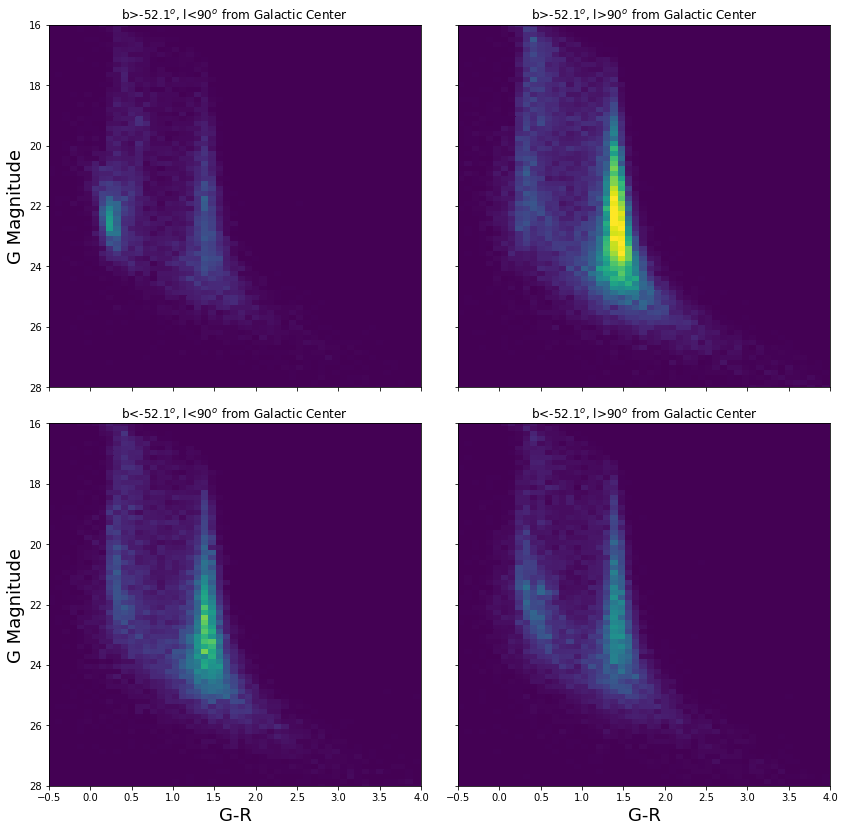

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14), sharey=True, sharex=True)


plt.subplots_adjust(wspace=0.1, hspace=0.1)

h1, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_llo], bins=100)
h2, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_llo], bins=100)
h3, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_hlo], bins=100)
h4, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_hlo], bins=100)
max_val = np.mean([np.max(h1), np.max(h2), np.max(h3), np.max(h4)]) # Trying to find a value that would produce the best color scaling.

h, xedges, yedges, _ = axs[0][0].hist2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_llo], bins=100, norm= matplotlib.colors.Normalize(0, max_val))
axs[1][0].hist2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_llo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[0][1].hist2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_G_DERED)[hla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[1][1].hist2d(np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_G_DERED)[lla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))

axs[1][0].set_xlabel("G-R", fontsize=18)
axs[1][1].set_xlabel("G-R", fontsize=18)

axs[0][0].set_ylabel("G Magnitude", fontsize=18)
axs[1][0].set_ylabel("G Magnitude", fontsize=18)

axs[0][0].set_xlim(-0.5, 4)
axs[0][0].set_ylim(16, 28)

axs[0][0].invert_yaxis()


axs[0][0].set_title("b>{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[0][1].set_title("b>{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][0].set_title("b<{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][1].set_title("b<{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))


plt.show()

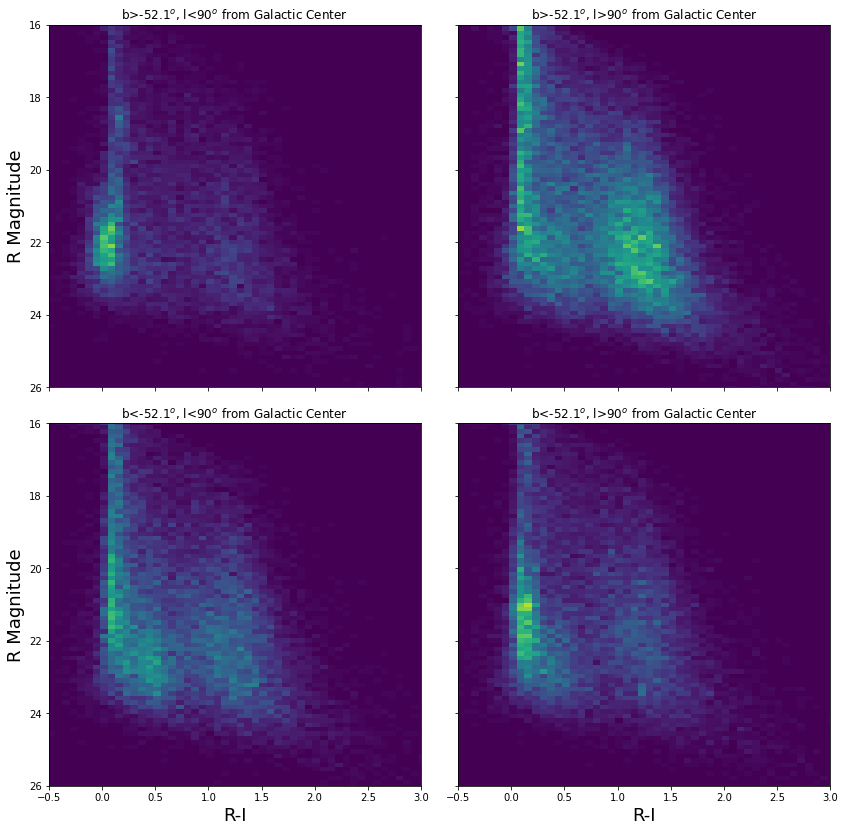

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14), sharey=True, sharex=True)


plt.subplots_adjust(wspace=0.1, hspace=0.1)

h1, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_llo], bins=100)
h2, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_llo], bins=100)
h3, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_hlo], bins=100)
h4, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_hlo], bins=100)
max_val = np.mean([np.max(h1), np.max(h2), np.max(h3), np.max(h4)]) # Trying to find a value that would produce the best color scaling.

h, xedges, yedges, _ = axs[0][0].hist2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_llo], bins=100, norm= matplotlib.colors.Normalize(0, max_val))
axs[1][0].hist2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_llo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[0][1].hist2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_R_DERED)[hla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[1][1].hist2d(np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_R_DERED)[lla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))

axs[1][0].set_xlabel("R-I", fontsize=18)
axs[1][1].set_xlabel("R-I", fontsize=18)

axs[0][0].set_ylabel("R Magnitude", fontsize=18)
axs[1][0].set_ylabel("R Magnitude", fontsize=18)

axs[0][0].set_xlim(-0.5, 3)
axs[0][0].set_ylim(16, 26)

axs[0][0].invert_yaxis()


axs[0][0].set_title("b>{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[0][1].set_title("b>{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][0].set_title("b<{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][1].set_title("b<{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))


plt.show()

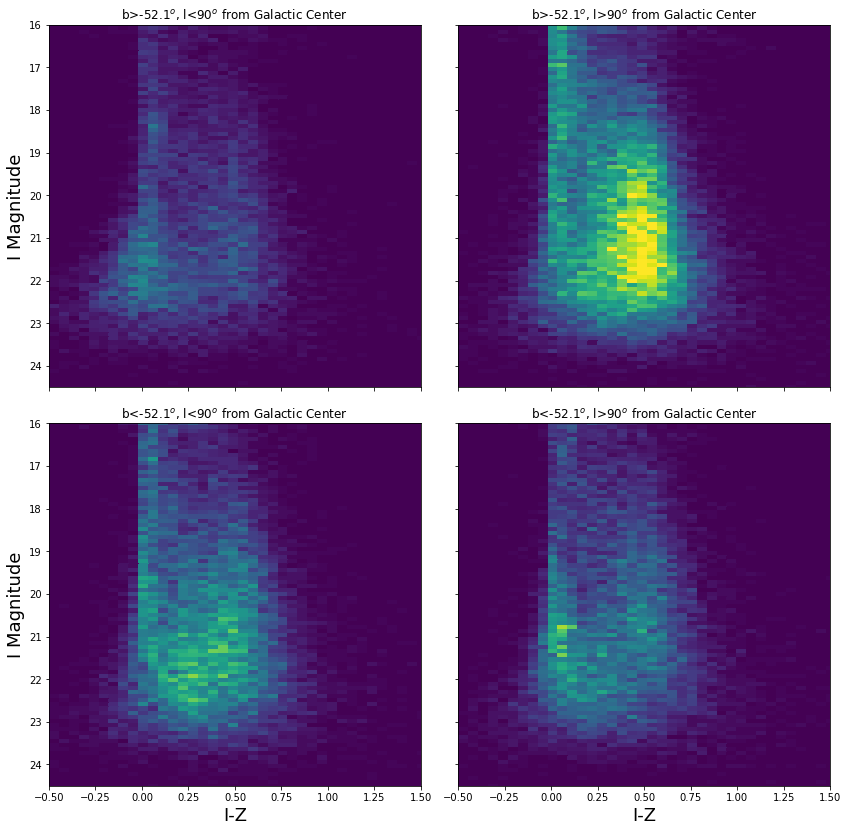

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14), sharey=True, sharex=True)


plt.subplots_adjust(wspace=0.1, hspace=0.1)

h1, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_llo], bins=100)
h2, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_llo], bins=100)
h3, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_hlo], bins=100)
h4, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_hlo], bins=100)
max_val = np.mean([np.max(h1), np.max(h2), np.max(h3), np.max(h4)]) # Trying to find a value that would produce the best color scaling.

h, xedges, yedges, _ = axs[0][0].hist2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_llo], bins=100, norm= matplotlib.colors.Normalize(0, max_val))
axs[1][0].hist2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_llo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[0][1].hist2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_I_DERED)[hla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[1][1].hist2d(np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_I_DERED)[lla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))

axs[1][0].set_xlabel("I-Z", fontsize=18)
axs[1][1].set_xlabel("I-Z", fontsize=18)

axs[0][0].set_ylabel("I Magnitude", fontsize=18)
axs[1][0].set_ylabel("I Magnitude", fontsize=18)

axs[0][0].set_xlim(-0.5, 1.5)
axs[0][0].set_ylim(16, 24.5)

axs[0][0].invert_yaxis()


axs[0][0].set_title("b>{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[0][1].set_title("b>{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][0].set_title("b<{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][1].set_title("b<{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))


plt.show()

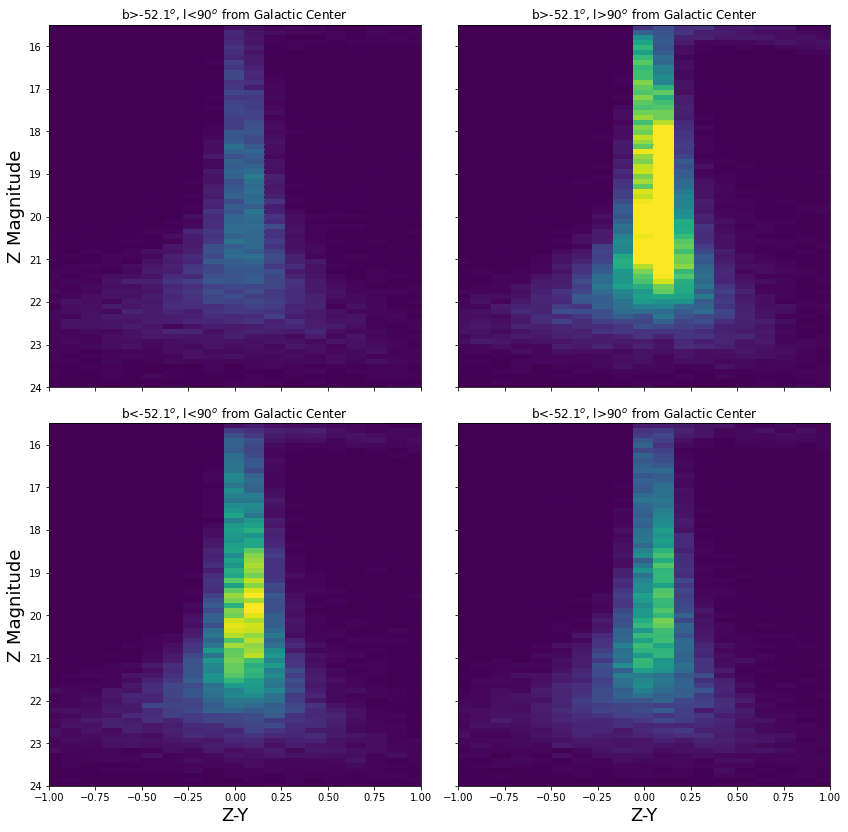

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14), sharey=True, sharex=True)


plt.subplots_adjust(wspace=0.1, hspace=0.1)

nbins=100

h1, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_llo], bins=nbins)
h2, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_llo], bins=nbins)
h3, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_hlo], bins=nbins)
h4, _, _ = np.histogram2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_hlo], bins=nbins)
max_val = np.mean([np.max(h1), np.max(h2), np.max(h3), np.max(h4)]) # Trying to find a value that would produce the best color scaling.

h, xedges, yedges, _ = axs[0][0].hist2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_llo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[hla_llo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_llo], bins=nbins, norm= matplotlib.colors.Normalize(0, max_val))
axs[1][0].hist2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_llo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[lla_llo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_llo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[0][1].hist2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_hlo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[hla_hlo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[hla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))
axs[1][1].hist2d(np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_hlo]-np.array(no_dropouts.MAG_AUTO_Y_DERED)[lla_hlo], np.array(no_dropouts.MAG_AUTO_Z_DERED)[lla_hlo], bins=[xedges, yedges], norm= matplotlib.colors.Normalize(0, max_val))

axs[1][0].set_xlabel("Z-Y", fontsize=18)
axs[1][1].set_xlabel("Z-Y", fontsize=18)

axs[0][0].set_ylabel("Z Magnitude", fontsize=18)
axs[1][0].set_ylabel("Z Magnitude", fontsize=18)

axs[0][0].set_xlim(-1, 1)
axs[0][0].set_ylim(15.5, 24)

axs[0][0].invert_yaxis()


axs[0][0].set_title("b>{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[0][1].set_title("b>{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][0].set_title("b<{b:.1f}$^o$, l<90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))
axs[1][1].set_title("b<{b:.1f}$^o$, l>90$^o$ from Galactic Center".format(b=meanlat, l=meanlong))


plt.show()

It does appear like we have some sort of situation in which there are two separate populations of stars (seen most clearly in the R-I plane).  Let's see if we can tell the difference between them, just by making separations and checking what features they have in common.

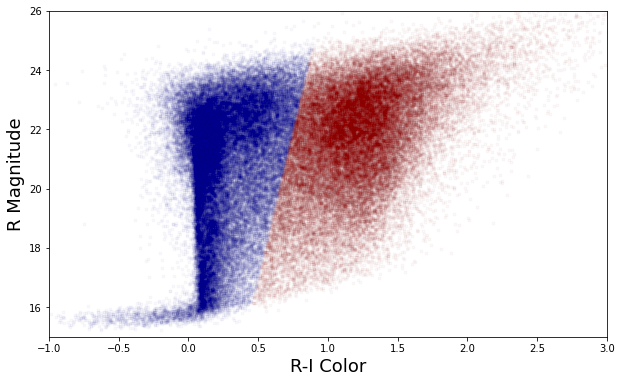

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(no_dropouts.MAG_AUTO_R_DERED)-np.array(no_dropouts.MAG_AUTO_I_DERED),
         np.array(no_dropouts.MAG_AUTO_R_DERED), ".k", alpha=0.01)
plt.xlim(-1, 3)
plt.ylim(15, 26)
plt.xlabel("R-I Color", fontsize=18)
plt.ylabel("R Magnitude", fontsize=18)


ri_color = np.array(no_dropouts.MAG_AUTO_R_DERED)-np.array(no_dropouts.MAG_AUTO_I_DERED)
r = np.array(no_dropouts.MAG_AUTO_R_DERED)

g1 = np.where((r>20*ri_color+7))
g2 = np.where((r<20*ri_color+7))

plt.plot(ri_color[g1], r[g1], ".b", alpha=0.01)
plt.plot(ri_color[g2], r[g2], ".r", alpha=0.01)



In [32]:
gr_color = np.array(no_dropouts.MAG_AUTO_G_DERED)-np.array(no_dropouts.MAG_AUTO_R_DERED)
g = np.array(no_dropouts.MAG_AUTO_G_DERED)
ri_color = np.array(no_dropouts.MAG_AUTO_R_DERED)-np.array(no_dropouts.MAG_AUTO_I_DERED)
r = np.array(no_dropouts.MAG_AUTO_R_DERED)
iz_color = np.array(no_dropouts.MAG_AUTO_I_DERED)-np.array(no_dropouts.MAG_AUTO_Z_DERED)
i = np.array(no_dropouts.MAG_AUTO_I_DERED)
zy_color = np.array(no_dropouts.MAG_AUTO_Z_DERED)-np.array(no_dropouts.MAG_AUTO_Y_DERED)
z = np.array(no_dropouts.MAG_AUTO_Z_DERED)

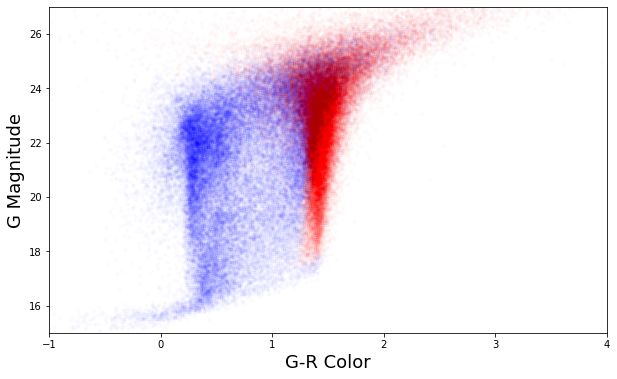

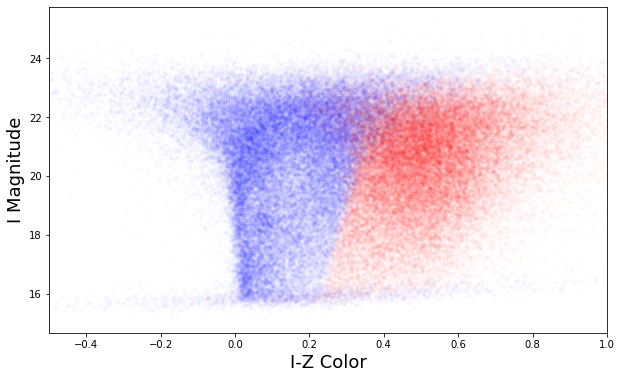

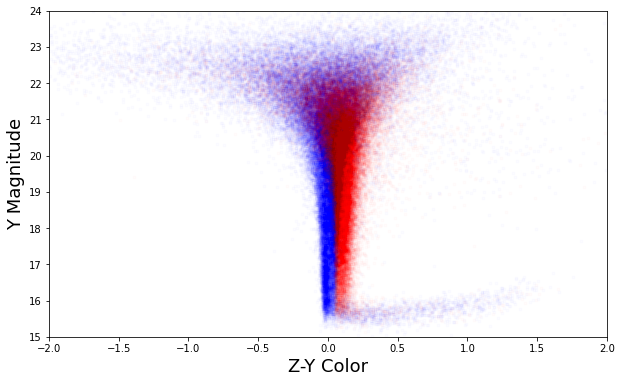

In [33]:
plt.figure(figsize=(10, 6))
#plt.plot(gr_color, g, ".k", alpha=0.01)
plt.xlim(-1, 4)
plt.ylim(15, 27)
plt.xlabel("G-R Color", fontsize=18)
plt.ylabel("G Magnitude", fontsize=18)

plt.plot(gr_color[g1], g[g1], ".b", alpha=0.01)
plt.plot(gr_color[g2], g[g2], ".r", alpha=0.01)
plt.show()

plt.figure(figsize=(10, 6))
#plt.plot(iz_color, i, ".k", alpha=0.01)
plt.xlim(-0.5, 1)
#plt.ylim(15, 26)
plt.xlabel("I-Z Color", fontsize=18)
plt.ylabel("I Magnitude", fontsize=18)

plt.plot(iz_color[g1], i[g1], ".b", alpha=0.01)
plt.plot(iz_color[g2], i[g2], ".r", alpha=0.01)
plt.show()

plt.figure(figsize=(10, 6))
#plt.plot(zy_color, z, ".k", alpha=0.01)
plt.xlim(-2, 2)
plt.ylim(15, 24)
plt.xlabel("Z-Y Color", fontsize=18)
plt.ylabel("Y Magnitude", fontsize=18)

plt.plot(zy_color[g1], z[g1], ".b", alpha=0.01)
plt.plot(zy_color[g2], z[g2], ".r", alpha=0.01)
plt.show()

This doesn't seem to tell us anything more exciting than the fact that this is clearly a population of redder stars and bluer stars. 

Number counts vs magnitude in various different bands.

14.12892914 34.19037247


Text(0, 0.5, 'Counts')

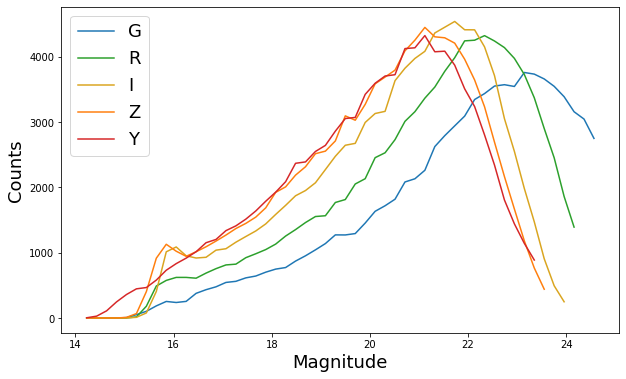

In [34]:
min_all = np.min([np.min(no_dropouts.MAG_AUTO_G_DERED),
       np.min(no_dropouts.MAG_AUTO_R_DERED),
       np.min(no_dropouts.MAG_AUTO_I_DERED),
       np.min(no_dropouts.MAG_AUTO_Z_DERED),
       np.min(no_dropouts.MAG_AUTO_Y_DERED)])

max_all = np.max([np.max(no_dropouts.MAG_AUTO_G_DERED),
       np.max(no_dropouts.MAG_AUTO_R_DERED),
       np.max(no_dropouts.MAG_AUTO_I_DERED),
       np.max(no_dropouts.MAG_AUTO_Z_DERED),
       np.max(no_dropouts.MAG_AUTO_Y_DERED)])

print(min_all, max_all)

bins = np.linspace(min_all, max_all, 100)

counts_g, _ = np.histogram(no_dropouts.MAG_AUTO_G_DERED, bins)
counts_r, _ = np.histogram(no_dropouts.MAG_AUTO_R_DERED, bins)
counts_i, _ = np.histogram(no_dropouts.MAG_AUTO_I_DERED, bins)
counts_z, _ = np.histogram(no_dropouts.MAG_AUTO_Z_DERED, bins)
counts_y, _ = np.histogram(no_dropouts.MAG_AUTO_Y_DERED, bins)

plt.figure(figsize=(10, 6))

bins_plot = (bins[1:] + bins[:-1])/2

# 95% completeness Magnitude limits from DES: https://arxiv.org/pdf/2101.05765.pdf
# g: 24.6
# r: 24.3
# i: 24.0
# z: 23.7
# y: 23.4

plt.plot(bins_plot[bins_plot<24.6], counts_g[bins_plot<24.6], color="C0", label="G")
plt.plot(bins_plot[bins_plot<24.3], counts_r[bins_plot<24.3], color="C2", label="R")
plt.plot(bins_plot[bins_plot<24.0], counts_i[bins_plot<24.0], color="goldenrod", label="I")
plt.plot(bins_plot[bins_plot<23.7], counts_z[bins_plot<23.7], color="C1", label="Z")
plt.plot(bins_plot[bins_plot<23.4], counts_y[bins_plot<23.4], color="C3", label="Y")
plt.legend(fontsize=18)
plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("Counts", fontsize=18)

I am intregued by this weird little "bump" around 15-16 magnitude but am not really sure what it means.  TODO: figure that out?